## Seeding for reproducibility

In [2]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

## Importing the dependencies


In [3]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Data Curation

In [4]:

# Load and prepare the Fashion MNIST dataset
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


Data Processing

In [5]:
type(train_images)

numpy.ndarray

In [6]:
type(train_labels)

numpy.ndarray

In [7]:
print(len(train_images))

60000


In [8]:

print(len(train_labels))

60000


In [9]:
print(len(test_images))

10000


In [10]:
print(train_images[0].shape)

(28, 28)


In [11]:
print(type(train_images[0]))

<class 'numpy.ndarray'>


In [12]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

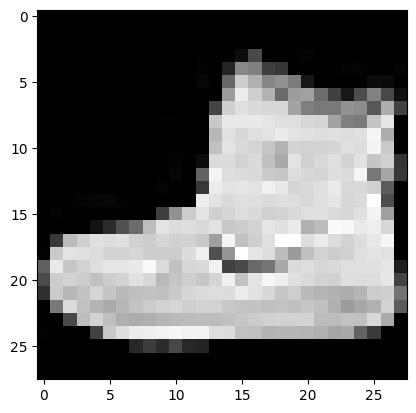

In [13]:
# Display an image from the dataset
plt.imshow(train_images[0], cmap='gray')
plt.show()


In [14]:
# corresponding lable for above image
print(train_labels[0])


9


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [15]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [16]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [17]:
# Reshape images to specify that it's a single channel (grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


In [18]:
train_images.shape

(60000, 28, 28, 1)

In [19]:
test_images.shape

(10000, 28, 28, 1)

# Convolutional Neural Network

In [20]:
# Build the convolutional base
model = models.Sequential()            #creating model variable using sequentional() method
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [21]:
# Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Model Training

In [22]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 13s 5ms/step - loss: 0.4887 - accuracy: 0.8216 - val_loss: 0.3599 - val_accuracy: 0.8741
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3181 - accuracy: 0.8837 - val_loss: 0.3167 - val_accuracy: 0.8849
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2699 - accuracy: 0.8998 - val_loss: 0.3114 - val_accuracy: 0.8906
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2403 - accuracy: 0.9104 - val_loss: 0.2694 - val_accuracy: 0.9016
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2179 - accuracy: 0.9184 - val_loss: 0.2755 - val_accuracy: 0.9046
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1962 - accuracy: 0.9279 - val_loss: 0.2606 - val_accuracy: 0.9072
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1806 - accuracy: 0.9332 - val_loss: 0.2638 - val_accuracy

# Model Evaluation

In [23]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 1s - loss: 0.2769 - accuracy: 0.9111 - 658ms/epoch - 2ms/step

Test accuracy: 0.9110999703407288


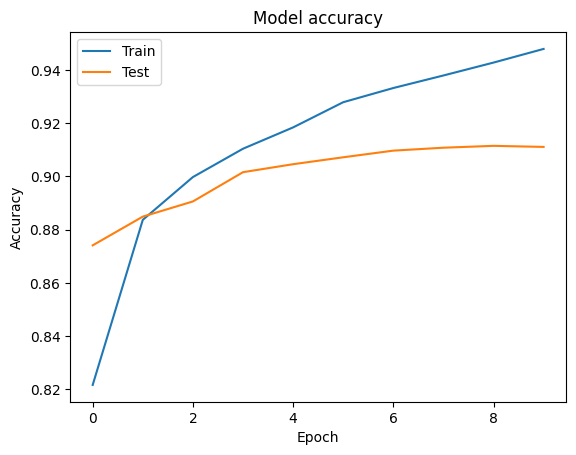

In [24]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


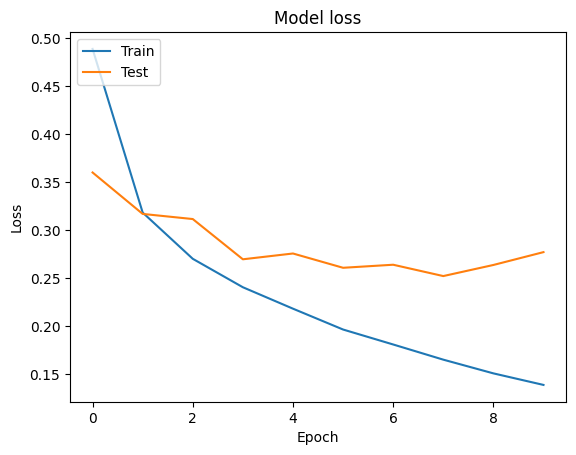

In [25]:

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [26]:
model.save('trained_fashion_mnist_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
